In [90]:
import pandas as pd
from surv_optimizer.db_utils.os_utils import get_project_data_path
import matplotlib.pyplot as plt
import numpy as np

d_path = get_project_data_path()

In [95]:
df = pd.read_csv(f"{d_path}/eda_overall_streams.csv", encoding="UTF-8")
idf = pd.read_csv(f"{d_path}/USUYG1459714_streams.csv", encoding="UTF-8")
df.columns = [x.lower() for x in df.columns]
idf.columns = [x.lower() for x in idf.columns]
print(f"File overall_streams.csv loaded successfully")

File overall_streams.csv loaded successfully


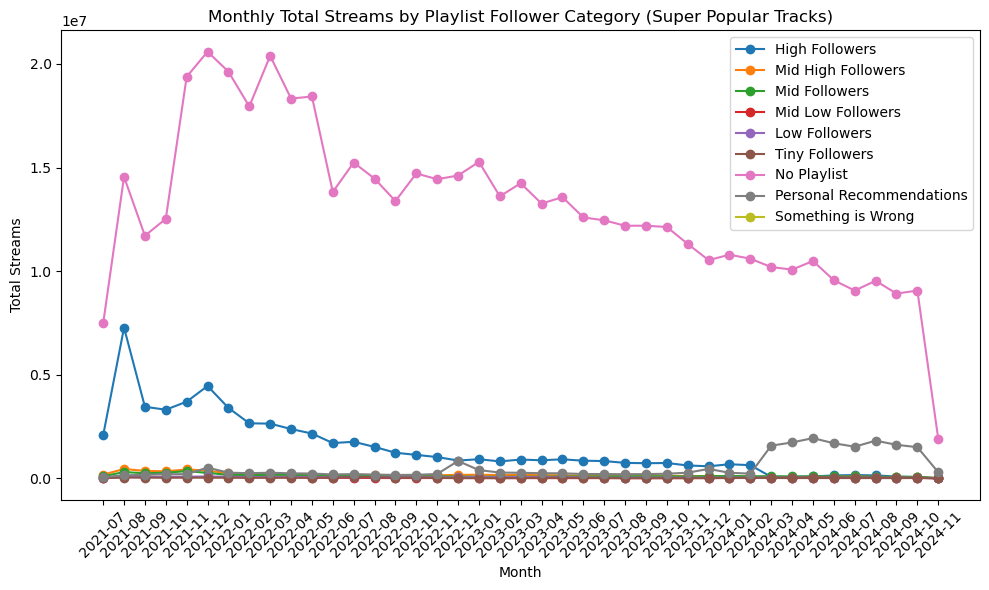

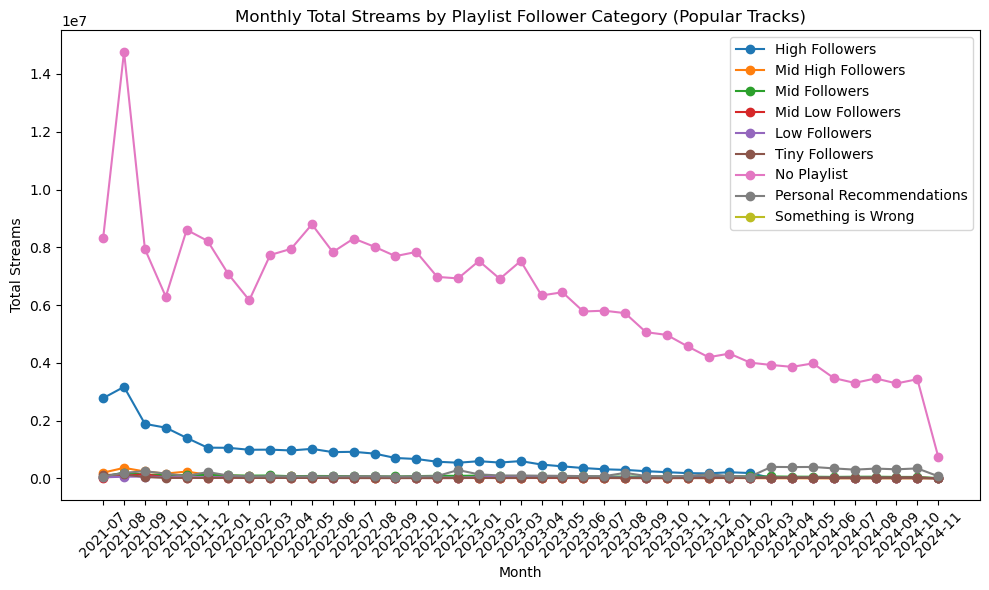

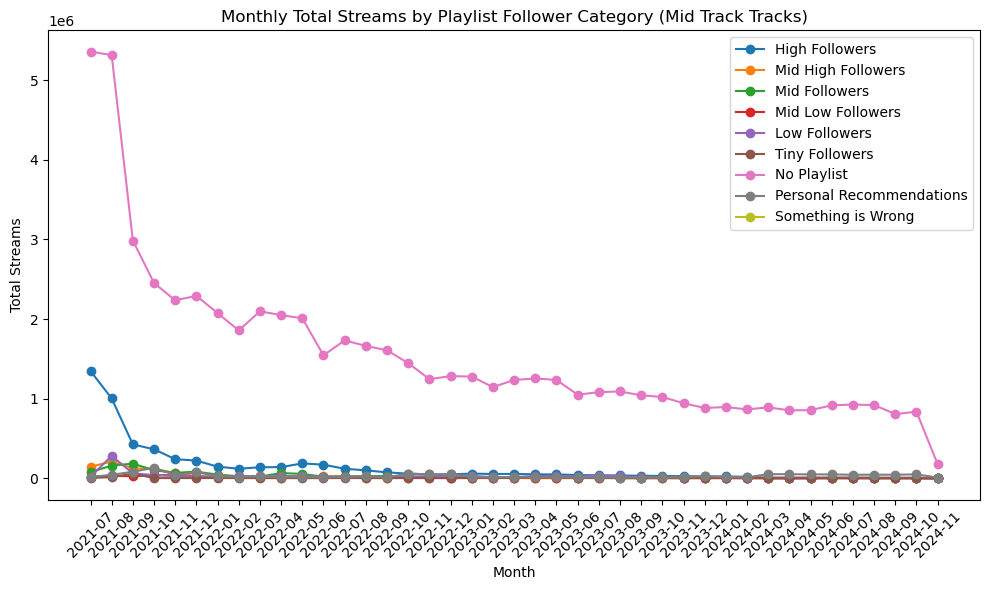

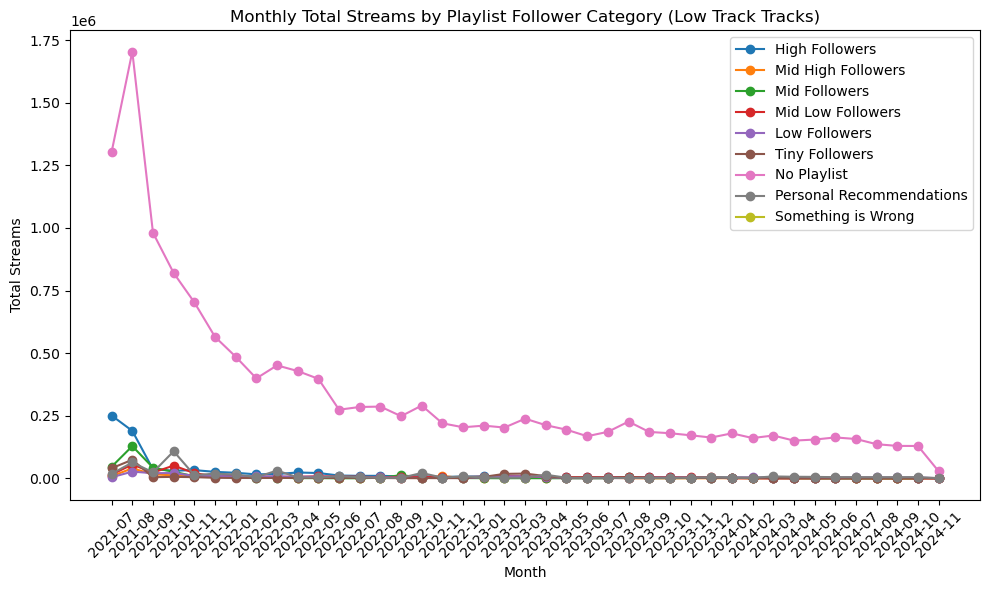

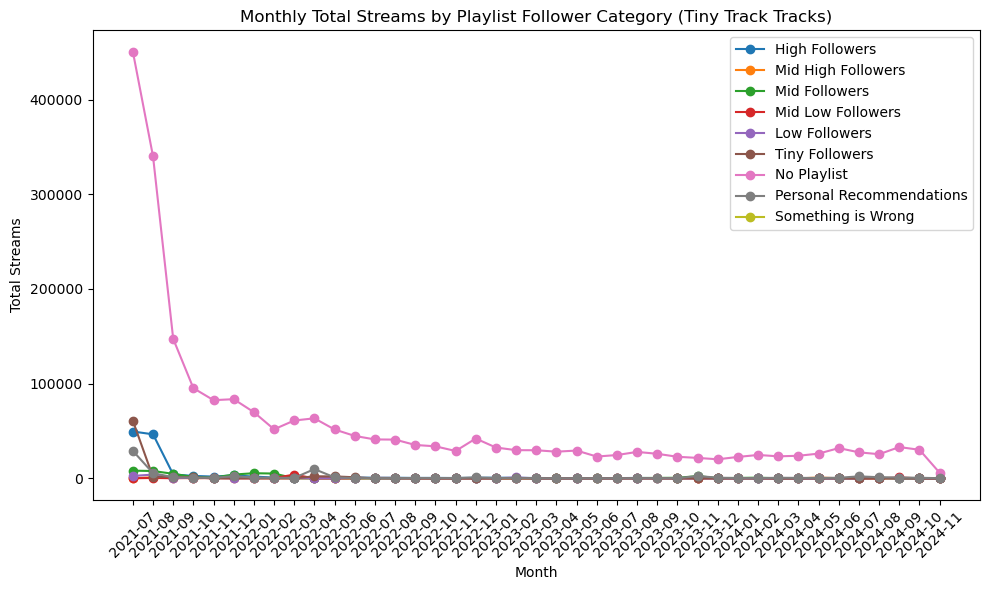

In [97]:
import pandas as pd

# Assuming df is your DataFrame containing the fields: 'follower_category', 'streams_date', 'total_streams', 'num_playlists', 'popularity_category'
df['streams_date'] = pd.to_datetime(df['streams_date'])  # Convert streams_date to datetime
df['month'] = df['streams_date'].dt.to_period('M')  # Extract month period (year-month)

# Define the track popularity categories you have in your dataset
popularity_categories = ['Super Popular', 'Popular', 'Mid Track', 'Low Track', 'Tiny Track']

# Group data by month, follower category, and track popularity category
monthly_grouped = df.groupby(['month', 'follower_category', 'popularity_category']).agg({
    'total_streams': 'sum',
    'num_playlists': 'sum',
    'num_tracks': 'sum'
}).reset_index()

# Iterate over each track popularity category and create a separate plot for each
for popularity in popularity_categories:
    # Filter data for the current popularity category
    popularity_data = monthly_grouped[monthly_grouped['popularity_category'] == popularity]

    # Create a figure for each popularity level
    fig, ax = plt.subplots(figsize=(10, 6))

    # Filter data by follower category
    high_followers = popularity_data[popularity_data['follower_category'] == 'High Followers']
    mid_high_followers = popularity_data[popularity_data['follower_category'] == 'Mid High Followers']
    mid_followers = popularity_data[popularity_data['follower_category'] == 'Mid Followers']
    mid_low_followers = popularity_data[popularity_data['follower_category'] == 'Mid Low Followers']
    low_followers = popularity_data[popularity_data['follower_category'] == 'Low Followers']
    tiny_followers = popularity_data[popularity_data['follower_category'] == 'Tiny Followers']
    no_playlist = popularity_data[popularity_data['follower_category'] == 'No playlist']
    recommendations = popularity_data[popularity_data['follower_category'] == 'Personal recommendations']
    error = popularity_data[popularity_data['follower_category'] == 'Something is wrong']

    # Plotting streams by month for each follower category within the current popularity category
    ax.plot(high_followers['month'].astype(str), high_followers['total_streams'],
            label='High Followers', marker='o')
    ax.plot(mid_high_followers['month'].astype(str),
            mid_high_followers['total_streams'], label='Mid High Followers',
            marker='o')
    ax.plot(mid_followers['month'].astype(str), mid_followers['total_streams'],
            label='Mid Followers', marker='o')
    ax.plot(mid_low_followers['month'].astype(str),
            mid_low_followers['total_streams'], label='Mid Low Followers',
            marker='o')
    ax.plot(low_followers['month'].astype(str), low_followers['total_streams'],
            label='Low Followers', marker='o')
    ax.plot(tiny_followers['month'].astype(str), tiny_followers['total_streams'],
            label='Tiny Followers', marker='o')
    ax.plot(no_playlist['month'].astype(str), no_playlist['total_streams'],
            label='No Playlist', marker='o')
    ax.plot(recommendations['month'].astype(str), recommendations['total_streams'],
            label='Personal Recommendations',
            marker='o')
    ax.plot(error['month'].astype(str), error['total_streams'], label='Something is Wrong',
            marker='o')

    # Set plot labels and title for each popularity category
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Streams')
    ax.set_title(f'Monthly Total Streams by Playlist Follower Category ({popularity} Tracks)')
    ax.legend()

    # Rotate x-axis labels and adjust layout
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot for the current popularity category
    plt.show()


In [85]:
high_followers

,month,follower_category,popularity_category,total_streams,num_playlists
12,2021-03,High Followers,Super Popular,1571991,254
52,2021-04,High Followers,Super Popular,7304108,1456
92,2021-05,High Followers,Super Popular,13005367,2572
132,2021-06,High Followers,Super Popular,11546833,2878
172,2021-07,High Followers,Super Popular,15110067,3545
212,2021-08,High Followers,Super Popular,19163785,4623
252,2021-09,High Followers,Super Popular,17224691,4831
292,2021-10,High Followers,Super Popular,21441596,5599
332,2021-11,High Followers,Super Popular,24889173,5830
372,2021-12,High Followers,Super Popular,30331732,6890


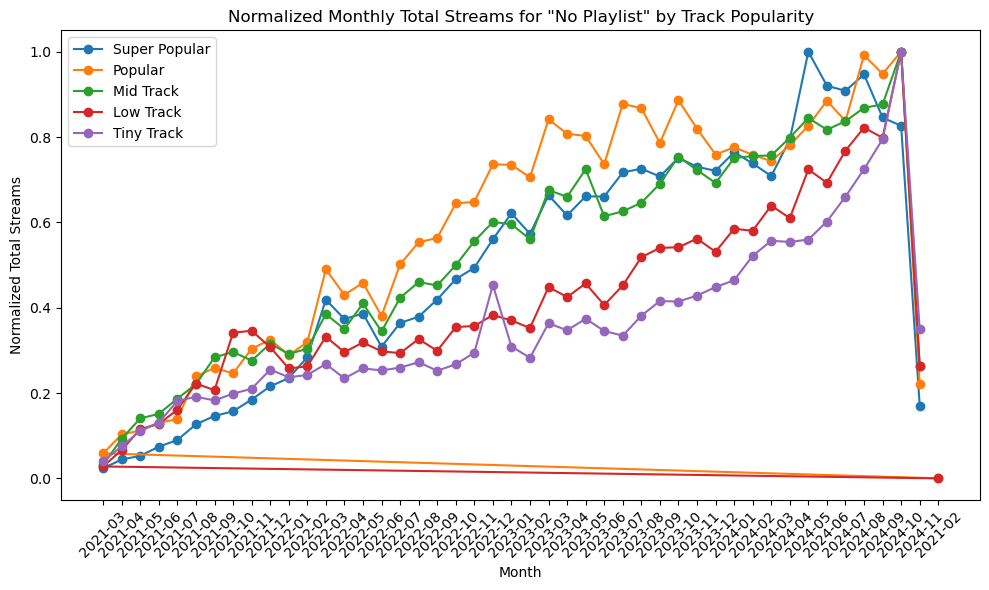

In [75]:
# Filter data to only include 'No playlist' category
no_playlist_data = df[df['follower_category'] == 'No playlist']

# Group data by month and popularity category for 'No playlist' only
monthly_grouped_no_playlist = no_playlist_data.groupby(['month', 'popularity_category']).agg({
    'total_streams': 'sum'
}).reset_index()

# Normalize the total_streams values for each popularity category
# Normalization: Divide by the max value in each popularity category to bring values between 0 and 1
monthly_grouped_no_playlist['normalized_streams'] = monthly_grouped_no_playlist.groupby('popularity_category')[
    'total_streams'].transform(lambda x: x / x.max())

# Define the track popularity categories
popularity_categories = ['Super Popular', 'Popular', 'Mid Track', 'Low Track', 'Tiny Track']

# Create the figure for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normalized streams for each popularity category on the same chart
for popularity in popularity_categories:
    popularity_data = monthly_grouped_no_playlist[monthly_grouped_no_playlist['popularity_category'] == popularity]
    ax.plot(popularity_data['month'].astype(str), popularity_data['normalized_streams'], label=popularity, marker='o')

# Set plot labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Normalized Total Streams')
ax.set_title('Normalized Monthly Total Streams for "No Playlist" by Track Popularity')
ax.legend()

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

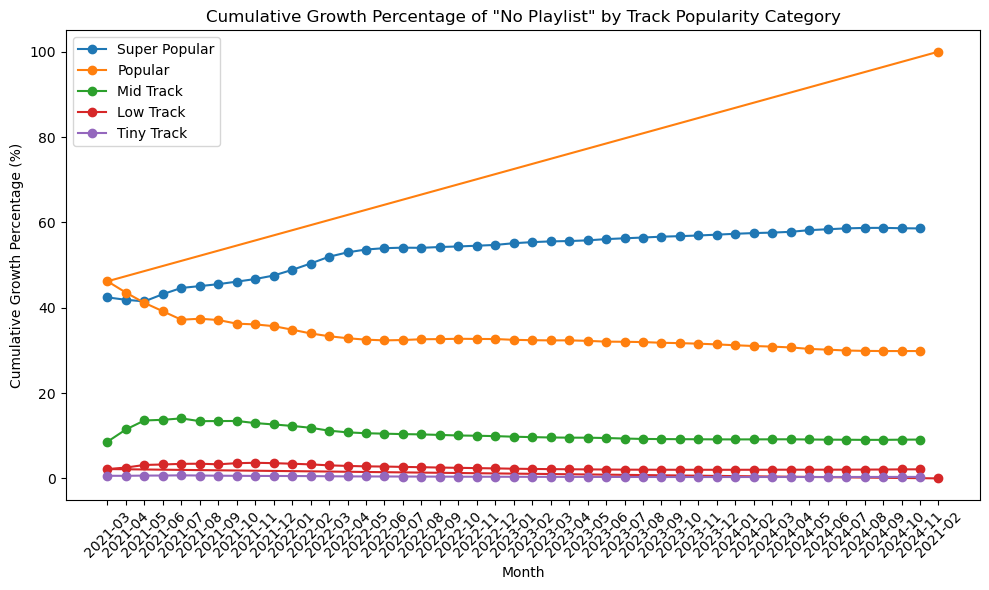

In [82]:
# Filter data to include only 'No playlist' follower category
no_playlist_data = df[df['follower_category'] == 'No playlist']

# Group data by month and track popularity category, summing the total streams
no_playlist_grouped = no_playlist_data.groupby(['month', 'popularity_category']).agg({
    'total_streams': 'sum'
}).reset_index()

# Calculate cumulative total streams for each popularity category
no_playlist_grouped['cumulative_streams'] = no_playlist_grouped.groupby('popularity_category')['total_streams'].cumsum()

# Calculate the overall cumulative growth for the "No Playlist" category (for normalization)
overall_cumulative_growth = no_playlist_grouped.groupby('month')['total_streams'].sum().cumsum().rename(
    'overall_cumulative_streams')

# Merge overall cumulative growth into the original DataFrame to calculate growth percentage
no_playlist_grouped = no_playlist_grouped.merge(overall_cumulative_growth, left_on='month', right_index=True)

# Calculate growth percentage for each popularity category relative to overall growth
no_playlist_grouped['growth_percentage'] = (no_playlist_grouped['cumulative_streams'] / no_playlist_grouped[
    'overall_cumulative_streams']) * 100

# Plotting cumulative growth percentage by track type
fig, ax = plt.subplots(figsize=(10, 6))

# Define track popularity categories for plotting
popularity_categories = ['Super Popular', 'Popular', 'Mid Track', 'Low Track', 'Tiny Track']

# Plot cumulative growth percentage for each track popularity category
for popularity in popularity_categories:
    category_data = no_playlist_grouped[no_playlist_grouped['popularity_category'] == popularity]
    ax.plot(category_data['month'].astype(str), category_data['growth_percentage'], label=popularity, marker='o')

# Set plot labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Cumulative Growth Percentage (%)')
ax.set_title('Cumulative Growth Percentage of "No Playlist" by Track Popularity Category')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

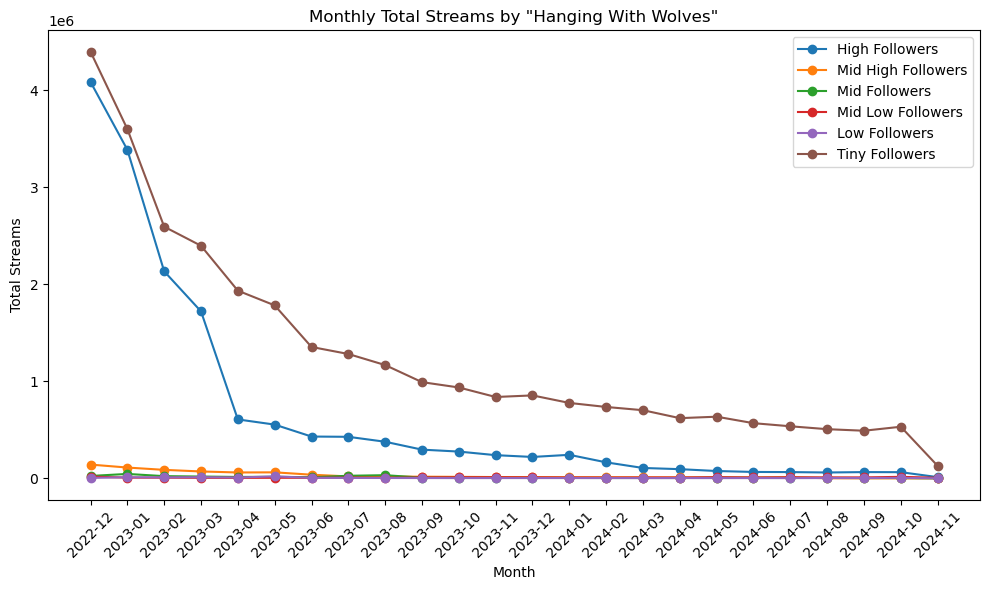

In [48]:
idf['streams_date'] = pd.to_datetime(idf['streams_date'])  # Convert streams_date to datetime

idf['month'] = idf['streams_date'].dt.to_period('M')  # Extract month period (year-month)

# Grouping data by month and follower category
monthly_grouped = idf.groupby(['month', 'follower_category']).agg({
    'total_streams': 'sum',
    'num_playlists': 'sum'
}).reset_index()

# Plotting the total streams for high and low follower categories by month
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Filter data by follower category
ihigh_followers = monthly_grouped[monthly_grouped['follower_category'] == 'High Followers']
imid_high_followers = monthly_grouped[monthly_grouped['follower_category'] == 'Mid High Followers']
imid_followers = monthly_grouped[monthly_grouped['follower_category'] == 'Mid Followers']
imid_low_followers = monthly_grouped[monthly_grouped['follower_category'] == 'Mid Low Followers']
ilow_followers = monthly_grouped[monthly_grouped['follower_category'] == 'Low Followers']
itiny_followers = monthly_grouped[monthly_grouped['follower_category'] == 'Tiny Followers']

# Plotting streams by month for each category
ax2.plot(ihigh_followers['month'].astype(str), ihigh_followers['total_streams'], label='High Followers', marker='o')
ax2.plot(imid_high_followers['month'].astype(str), imid_high_followers['total_streams'], label='Mid High Followers',
         marker='o')
ax2.plot(imid_followers['month'].astype(str), imid_followers['total_streams'], label='Mid Followers', marker='o')
ax2.plot(imid_low_followers['month'].astype(str), imid_low_followers['total_streams'], label='Mid Low Followers',
         marker='o')
ax2.plot(ilow_followers['month'].astype(str), ilow_followers['total_streams'], label='Low Followers', marker='o')
ax2.plot(itiny_followers['month'].astype(str), itiny_followers['total_streams'], label='Tiny Followers', marker='o')
# Set plot labels and title
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Streams')
ax2.set_title('Monthly Total Streams by "Hanging With Wolves"')
ax2.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()